In [92]:
#in His Name

<p></p>
<br />
<div id="sec_madules" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <font color=#0f6d02 size=5>
            نصب و فراخوانی ماژول‌ها
        </font>
		<p></p>
		<hr>
        <ul>
        <li>
        <code>numpy</code> برای انجام عملیات آرایه‌ای
        </li>
        <li>
        <code>matplotlib</code> برای تصویرسازی داده
        </li>
        <li>
        <code>sklearn</code> برای دسترسی به مجموعه دادهٔ دیابت
        </li>
        </ul>
	</font>
</div>

In [93]:
!pip install numpy
!pip install matplotlib
!pip install sklearn

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

<p></p>
<br />
<div id="sec_reg" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <font color=#0f6d02 size=5>
           پیاده‌سازی توابع رگرسیون خطی
        </font>
		<p></p>
		<hr>
	</font>
</div>


In [134]:
class Linear_Regression:
    def __init__(self):
        self.x = 0
        self.y = 0
        self.alpha0 = 0
        self.alpha1 = 0
        self.coefficients = [self.alpha0, self.alpha1]
    
    def fit(self, x, y):
        self.x = np.array(x)
        self.y = np.array(y)
        
        n = np.size(x) 
        m_x, m_y = np.mean(x), np.mean(y)     
        SS_xy = np.sum(y*x) - n*m_y*m_x 
        SS_xx = np.sum(x*x) - n*m_x*m_x           
        self.alpha1 = SS_xy / SS_xx 
        self.alpha0 = m_y - self.alpha1*m_x

#         self.alpha1 = np.cov(self.x, self.y)[0][1] / self.x.var()
#         self.alpha0 = self.y.mean() - self.alpha1 * self.x.mean()
        
        self.coefficients = [self.alpha0, self.alpha1]
        return self
    
    def predict(self, x):
        predictions = list()
        
        for value in x:
            predictions.append(self.alpha0 + self.alpha1 * value)
            
        return predictions
    
    def mean_squared_error(self, y_test, y_pred):
        y_test = np.array(y_test)
        y_pred = np.array(y_pred)
        return np.mean((y_test - y_pred) ** 2)

<p></p>
<br />
<div id="sec_dataset" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <font color=#0f6d02 size=5>
           دسترسی به مجموعه دادهٔ دیابت
        </font>
		<p></p>
		<hr>
	</font>
</div>

In [135]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

<p></p>
<br />
<div id="sec_split" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <font color=#0f6d02 size=5>
           تقسیم داده به دو قسمت آموزش و آزمون
        </font>
		<p></p>
		<hr>
	</font>
</div>

In [136]:
# Use only one feature(BMI)
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
n = 100
diabetes_X_train = diabetes_X[:-n].reshape(-1)
diabetes_X_test = diabetes_X[-n:].reshape(-1)

# Split the targets into training/testing sets
diabetes_Y_train = diabetes.target[:-n]
diabetes_Y_test = diabetes.target[-n:]

<p></p>
<br />
<div id="sec_reg_def" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <font color=#0f6d02 size=5>
           تعریف مدل و اعمال مدل رگرسیون خطی روی داده
        </font>
		<p></p>
		<hr>
	</font>
</div>

In [137]:
# Create linear regression object
regr = Linear_Regression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_Y_train)

# Make predictions using the testing set
diabetes_Y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coefficients)

print("Mean squared error: {}".format(regr.mean_squared_error(diabetes_Y_test, diabetes_Y_pred)))

Coefficients: 
 [0, 953.360627200114]
Mean squared error: 26748.156978217852


<p></p>
<br />
<div id="sec_vis" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <font color=#0f6d02 size=5>
           رسم خط برازش‌یافته
        </font>
		<p></p>
		<hr>
	</font>
</div>

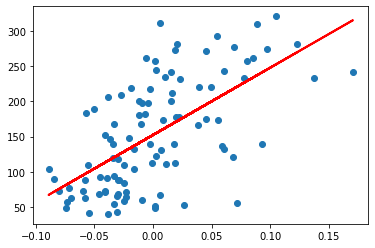

In [100]:
plt.scatter(diabetes_X_test, diabetes_Y_test)
plt.plot(diabetes_X_test, diabetes_Y_pred, c='r', linewidth=2)